In [1]:
import pandas as pd

from simulator import BettingSimulation, simulate_multiple_seasons
from plotting import (
    plot_probs_results_comparison, 
    plot_dss_results_comparison,
    plot_all_results_comparison,
    plot_cumulative_profit_comparison
)


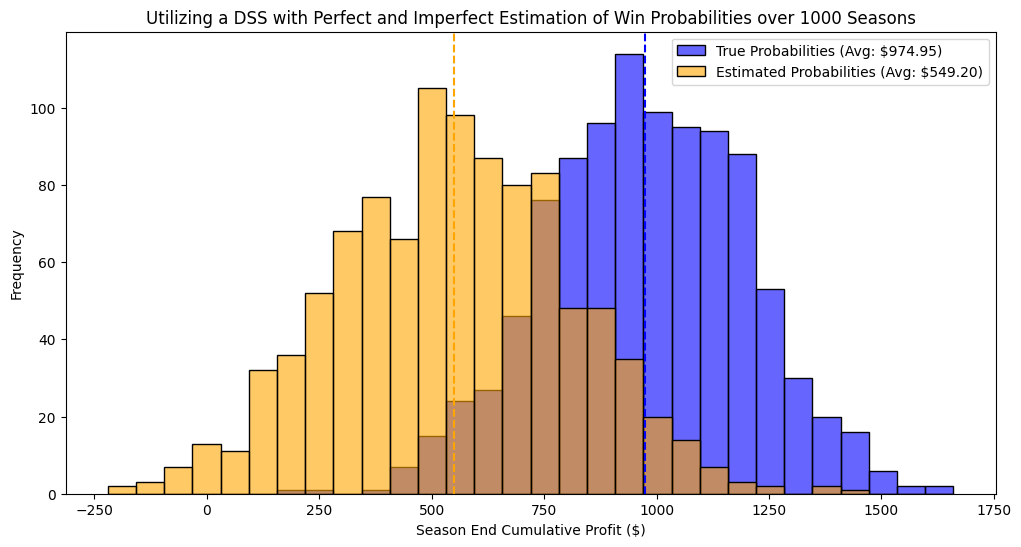

Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-220.00
Using Estimated Probabilities - Best-case final profit: $1440.00


<Figure size 640x480 with 0 Axes>

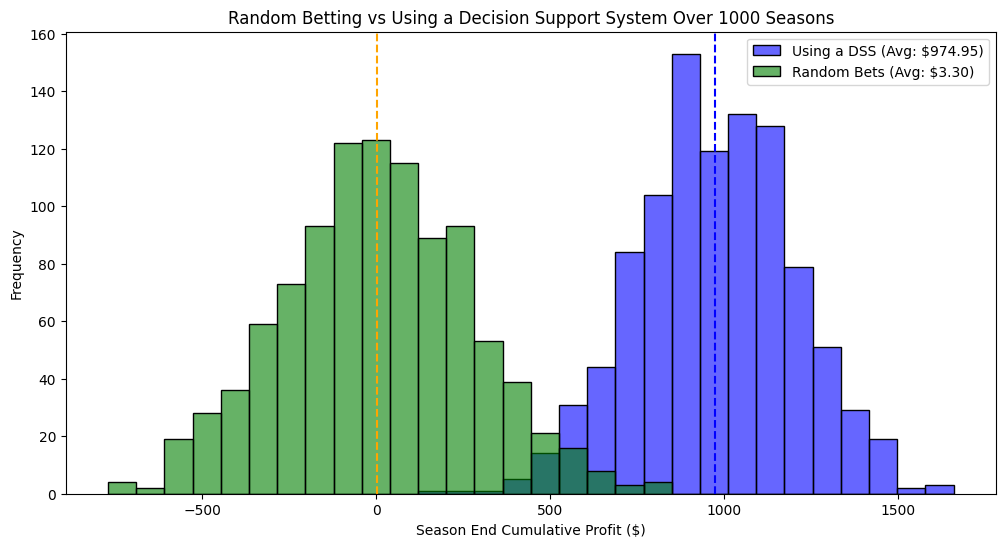

Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-771.00
Using Estimated Probabilities - Best-case final profit: $827.00


<Figure size 640x480 with 0 Axes>

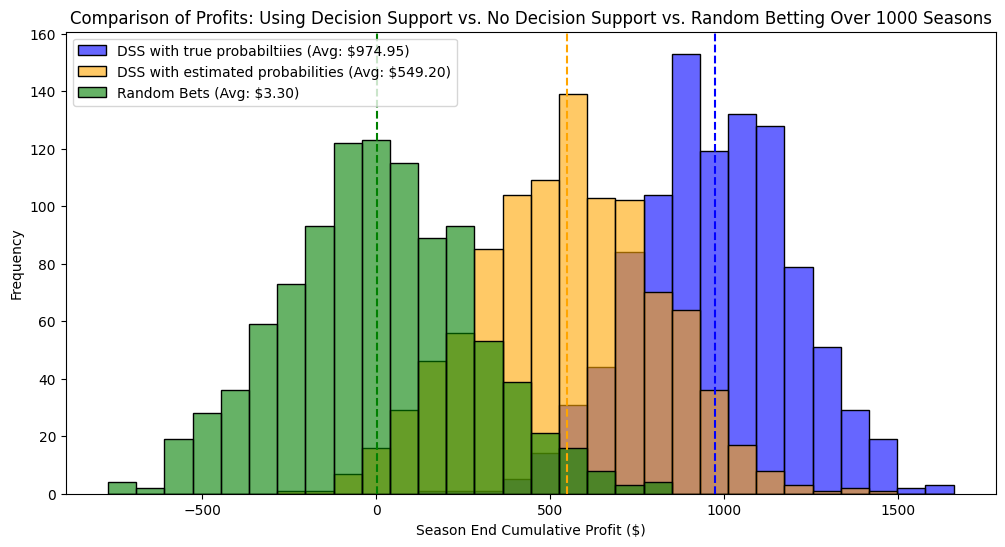

Using True Probabilities - Worst-case final profit: $160.00
Using True Probabilities - Best-case final profit: $1660.00
Using Estimated Probabilities - Worst-case final profit: $-220.00
Using Estimated Probabilities - Best-case final profit: $1440.00
Using Random Bets - Worst-case final profit: $-771.00
Using Random Bets - Best-case final profit: $827.00


<Figure size 640x480 with 0 Axes>

In [2]:
# Simulate seasons with estimation error
final_profits_true, final_profits_estimated, final_profits_random, all_results = simulate_multiple_seasons(
    num_seasons=1000,
    num_games=82,
    estimation_error=0.5,  # Adjust this value to simulate estimation error
    limited_estimates=False,  # Set to True if you want to use limited estimates
)

# Generate comparison plots
plot_probs_results_comparison(final_profits_true, final_profits_estimated, savefig=True)
plot_dss_results_comparison(final_profits_true, final_profits_random, savefig=True)
plot_all_results_comparison(final_profits_true, final_profits_estimated, final_profits_random, savefig=True)

In [3]:
# Combine final profits true and estimated into a dataframe
results_df = pd.DataFrame({
    'True Probabilities': final_profits_true,
    'Estimated Probabilities': final_profits_estimated,
    'Random Betting': final_profits_random
})

# Save the dataframe to a CSV file
csv_filename = 'final_profits_comparison.csv'
results_df.to_csv(f"./data/{csv_filename}", index=False)

print(f"Results saved to {csv_filename}")


Results saved to final_profits_comparison.csv


In [4]:
# This code searches for instances where, at game 20, the cumulative profit from random betting is greater 
# than the cumulative profit from betting with true probabilities. Use it in the plotting function below.
game = 20
for season in range(1000):
    if all_results[season].loc[game, 'Cumulative Profit ($) - Random'] > all_results[season].loc[game, 'Cumulative Profit ($) - True Probabilities']:
        print(season)

161
350
494
526
547
593
660
693
754
869
961
966
987
994


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


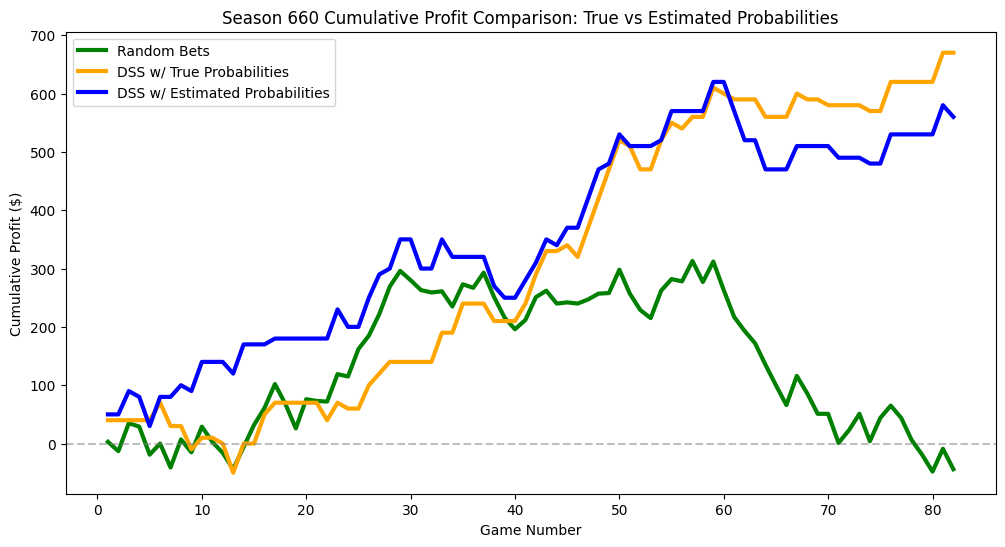

In [11]:
season = 660
columns = all_results[season].columns
experiment1_cols = ["Opponent", "True Probability (%)", "Bet Amount ($) - Random", "Game Outcome", "Profit ($) - True Probabilities",  "Cumulative Profit ($) - Random"]
experiment2_cols = ["Opponent", "True Probability (%)", "Bet Amount ($) - True Probabilities", "Game Outcome", "Profit ($) - True Probabilities",  "Cumulative Profit ($) - True Probabilities"]
experiment3_cols = ["Opponent", "True Probability (%)", "Estimated Probability (%)", "Bet Amount ($) - Estimated Probabilities", "Game Outcome", "Profit ($) - Estimated Probabilities",  "Cumulative Profit ($) - Estimated Probabilities"]

experiment1_names = ["Opponent", "True Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]
experiment2_names = ["Opponent", "True Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]
experiment3_names = ["Opponent", "True Probability (%)", "Estimated Probability (%)", "Bet Amount ($)", "Game Outcome", "Profit ($)",  "Cumulative Profit ($)"]


exp1 = all_results[season][experiment1_cols].rename(columns=dict(zip(experiment1_cols, experiment1_names)))
exp1.to_csv('./data/experiment1.csv', index=True)

exp2 = all_results[season][experiment2_cols].rename(columns=dict(zip(experiment2_cols, experiment2_names)))
exp2.to_csv('./data/experiment2.csv', index=True)

exp3 = all_results[season][experiment3_cols].rename(columns=dict(zip(experiment3_cols, experiment3_names)))
exp3.to_csv('./data/experiment3.csv', index=True)

plot_cumulative_profit_comparison(exp1, exp2, exp3, season = season, savefig=True)

In [14]:
exp3

,Opponent,True Probability (%),Estimated Probability (%),Bet Amount ($),Game Outcome,Profit ($),Cumulative Profit ($)
Game,,,,,,,
1,Indiana Pacers,80,100,50,1,50,50
2,Houston Rockets,30,0,0,0,0,50
3,Portland Trail Blazers,40,80,40,1,40,90
4,Houston Rockets,40,50,10,0,-10,80
5,Brooklyn Nets,10,100,50,0,-50,30
...,...,...,...,...,...,...,...
78,LA Clippers,10,40,0,0,0,530
79,Washington Wizards,40,10,0,0,0,530
80,Milwaukee Bucks,0,30,0,0,0,530
